<a href="https://colab.research.google.com/github/Hugo99/Clasificando-imagenes-de-deportes/blob/main/ClasificacionDeImagenes_HAEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Clacifiacación de Imagenes con RNN</h1>

<h3>Redes Neuronales</h3>
<h3>Universidad de Sonora</h3>
<h3>Hugo Alberto Eguino A.</h3>
</br>

<p>En este proyecto se mostrara como clasificar imágenes de distintos deportes. Para esto usaremos <strong>keras.Sequential</strong> y los datos se cargaran usando <strong>preprocessing.image_dataset_from_directory</strong>.</p>

<h3>Primero importaremos las librerías necesarias y importaremos las imágenes que usaremos.</h3>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
!curl -O https://download2285.mediafire.com/zbk30nacg4yg/gpedn4sy69nmmxz/sports_photos.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.4M  100 25.4M    0     0  11.9M      0  0:00:02  0:00:02 --:--:-- 11.9M


In [3]:
!curl -O https://download847.mediafire.com/lbmagr22gtjg/2wye7c1nkzhnsyl/ImgClas.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1126k  100 1126k    0     0  2465k      0 --:--:-- --:--:-- --:--:-- 2465k


In [5]:
!unzip ./sports_photos.zip

Archive:  ./sports_photos.zip
   creating: sports_photos/
  inflating: __MACOSX/._sports_photos  
  inflating: sports_photos/.DS_Store  
  inflating: __MACOSX/sports_photos/._.DS_Store  
   creating: sports_photos/football/
  inflating: __MACOSX/sports_photos/._football  
   creating: sports_photos/baseball/
  inflating: __MACOSX/sports_photos/._baseball  
   creating: sports_photos/basketball/
  inflating: __MACOSX/sports_photos/._basketball  
   creating: sports_photos/americano/
  inflating: __MACOSX/sports_photos/._americano  
   creating: sports_photos/formula1/
  inflating: __MACOSX/sports_photos/._formula1  
  inflating: sports_photos/football/FootBall33.jpg  
  inflating: __MACOSX/sports_photos/football/._FootBall33.jpg  
  inflating: sports_photos/football/FootBall27.jpg  
  inflating: __MACOSX/sports_photos/football/._FootBall27.jpg  
  inflating: sports_photos/football/FootBall26.jpg  
  inflating: __MACOSX/sports_photos/football/._FootBall26.jpg  
  inflating: sports_photos

In [6]:
!unzip ./ImgClas.zip

Archive:  ./ImgClas.zip
   creating: ImgClas/
  inflating: __MACOSX/._ImgClas      
  inflating: ImgClas/americano2.jpg  
  inflating: __MACOSX/ImgClas/._americano2.jpg  
  inflating: ImgClas/fut2.jpg        
  inflating: __MACOSX/ImgClas/._fut2.jpg  
  inflating: ImgClas/.DS_Store       
  inflating: __MACOSX/ImgClas/._.DS_Store  
  inflating: ImgClas/f1.jpg          
  inflating: __MACOSX/ImgClas/._f1.jpg  
  inflating: ImgClas/f2.jpg          
  inflating: __MACOSX/ImgClas/._f2.jpg  
  inflating: ImgClas/am1.jpg         
  inflating: __MACOSX/ImgClas/._am1.jpg  
  inflating: ImgClas/base1.jpg       
  inflating: __MACOSX/ImgClas/._base1.jpg  
  inflating: ImgClas/base2.jpg       
  inflating: __MACOSX/ImgClas/._base2.jpg  
  inflating: ImgClas/fut1.jpeg       
  inflating: __MACOSX/ImgClas/._fut1.jpeg  
  inflating: ImgClas/tenis.jpg       
  inflating: __MACOSX/ImgClas/._tenis.jpg  
  inflating: ImgClas/golf.jpg        
  inflating: __MACOSX/ImgClas/._golf.jpg  
  inflating: ImgCla

In [7]:
import pathlib
data_dir = tf.keras.utils.get_file('/content/sports_photos/','/content/sports_photos/',)
data_dir = pathlib.Path(data_dir)
print(data_dir)

/content/sports_photos


In [8]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)


294


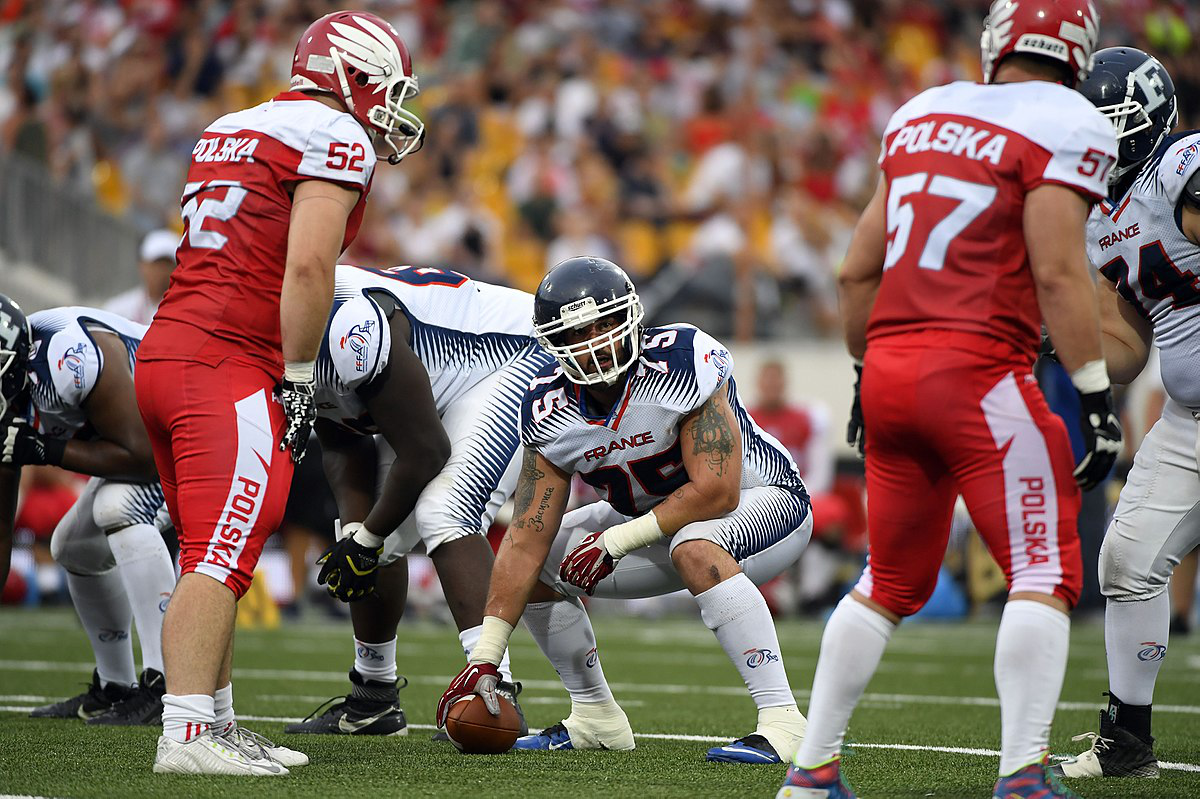

In [9]:
americano = list(data_dir.glob('americano/*'))
PIL.Image.open(str(americano[0]))

<p>Una ves ya importadas las imágenes, se definen algunos parámetros para el cargador.</p>

In [10]:
batch_size = 32
img_height = 180
img_width = 180

<p>Usamos una división para la validación al desarrollar el modelo. Usaremos el 80% de las imágenes para entrenamiento y el 20% restante para validación.</p>

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 294 files belonging to 5 classes.
Using 236 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 294 files belonging to 5 classes.
Using 58 files for validation.


<p>Con <strong>.class_names</strong> podemos ver las clases. Estos son nombres de los directorios.</p>

In [13]:
class_names = train_ds.class_names
print(class_names)

['americano', 'baseball', 'basketball', 'football', 'formula1']


<p>Visualizamos los primero 9 datos del conjunto de entrenamiento.</p>

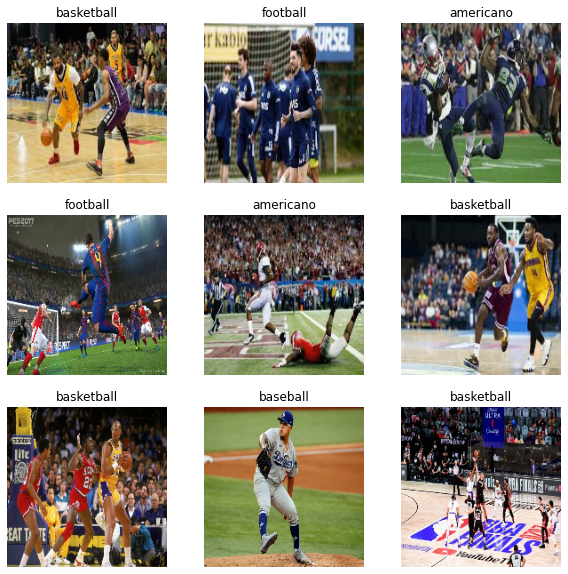

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

<p>El modelo lo entrenaremos usando este conjunto de datos pasándolo a <strong>model.fit</strong></p>


In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


<p><strong>image_batch</strong> es un tensor de (32,180,180,3), que seria un lote de 32 imágenes de 180x180x3, la ultima dimensión es el canal de colores RGB. <strong>labels_batch</strong> es un tensor de (32), esto correspondiente a las 32 imágenes.</P>


<h3>Configuración del conjunto para el rendimiento <h3>

<p><strong>Datasat_cache()</strong> Con esta mantenemos las imágenes en el cache después de se cargan fuera del disco duro en el primer epoch. Esto para asegurar que le conjunto no se convierta en un cuello de botella mientras entra el modelo.</p>
</br>

<p><strong>Dataset_Prefetch</strong> Esta superpone el procesamiento de y la ejecución del modelo durante el entrenamiento.</p>

In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

<h3>Estandarizacion de datos</h3>

<p>Los valores del canal de RGB estan en el rango de (0,255). Estos no son los ideales para una Red Neuronal, por lo que se debe de tratar de hacer que sus valores sean pequeños. Asi que estandarizamos los valores para que enten en el rango de (0,1), esto por medio de una capa de cambio de escala.</p>

In [19]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [20]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


<h3>Creando modelo</h3>

<p>El modelo esta formado de tres bloques convolucionales con una capa de grupo máximo en cada uno. Una de las capas esta conectada completamente con las 128 unidades encima que se activan mediante una función de activación Relu.</p>


In [21]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

<p>Para compilar el modelo se eligió de <strong>optimizers.Adam</strong> el optimizador <strong>losses.SparseCategoricalCrossentropy</strong>. Para ver la precisión del entrenamiento y la validación para cada epoch se pasara el argumento de <strong>metrics</strong>.</p>

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<h3>Resumen del modelo</h3>

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

<p>Al entrenar el modelo, en la libreta que tome como referencia usaban solo 10 epochs, yo use 20 ya que tengo una base de datos mucho mas chica que la que se usa en el ejemplo.</p>

In [24]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
8/8 [==============================] - 9s 980ms/step - loss: 1.9722 - accuracy: 0.2272 - val_loss: 1.5527 - val_accuracy: 0.3966
Epoch 2/20
8/8 [==============================] - 7s 956ms/step - loss: 1.5081 - accuracy: 0.4403 - val_loss: 1.4862 - val_accuracy: 0.2586
Epoch 3/20
8/8 [==============================] - 7s 879ms/step - loss: 1.2305 - accuracy: 0.5908 - val_loss: 1.3014 - val_accuracy: 0.3966
Epoch 4/20
8/8 [==============================] - 7s 890ms/step - loss: 0.9548 - accuracy: 0.6423 - val_loss: 1.0690 - val_accuracy: 0.6207
Epoch 5/20
8/8 [==============================] - 7s 882ms/step - loss: 0.8270 - accuracy: 0.7091 - val_loss: 1.1723 - val_accuracy: 0.5172
Epoch 6/20
8/8 [==============================] - 7s 880ms/step - loss: 0.5724 - accuracy: 0.7826 - val_loss: 1.1023 - val_accuracy: 0.6207
Epoch 7/20
8/8 [==============================] - 7s 893ms/step - loss: 0.3993 - accuracy: 0.8757 - val_loss: 0.8555 - val_accuracy: 0.6897
Epoch 8/20
8/8 [====

<p>Vemos los resultados del entrenamiento, esto creando una grafica de la perdida y la precisión en los conjuntos de entrenamiento y validación.</p> 

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<p>En las gráficas podemos ver que la precisión del entrenamiento y de la validación tiene un margen bastante amplio por lo que el modelo solo logro alrededor de 55% de precisión con el conjunto de validación.</p>

<p>Para aumentar los datos se utiliza <strong>tf.keras.layers.experimental.preprocessing</strong>. Esto se incluye dentro del modelo como otras capas.</p>

In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

<p>Aquí vemos algunos ejemplo de como se ve al aplicar el aumentar los datos a la misma imagen varias veces.</p>

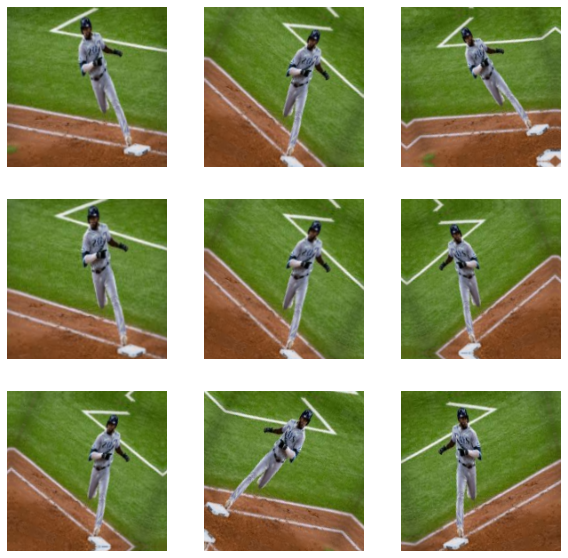

In [27]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

<p>Aplicamos <strong>Dropout</strong> esto para eliminar aleatoriamente una cantidad de unidades de salida en el entrenamiento. El <strong>Dropout</strong> toma fracciones como valores de entrada, en forma 0.2, 0.3, etc. Por lo que elimina el 20% o 30% de las unidades de salida al azar de la capa.</p>

In [28]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Se compila el modelo y vemos un resumen de las entradas y salidas. 

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

Entrenamos el modelo 

In [31]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
8/8 [==============================] - 9s 1s/step - loss: 1.8055 - accuracy: 0.2259 - val_loss: 1.5913 - val_accuracy: 0.1379
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 1.5925 - accuracy: 0.2241 - val_loss: 1.5952 - val_accuracy: 0.2241
Epoch 3/20
8/8 [==============================] - 8s 1s/step - loss: 1.5266 - accuracy: 0.3430 - val_loss: 1.4132 - val_accuracy: 0.4310
Epoch 4/20
8/8 [==============================] - 8s 1s/step - loss: 1.3581 - accuracy: 0.4519 - val_loss: 1.3542 - val_accuracy: 0.3276
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 1.2037 - accuracy: 0.5649 - val_loss: 1.5336 - val_accuracy: 0.3448
Epoch 6/20
8/8 [==============================] - 8s 1s/step - loss: 1.0254 - accuracy: 0.6115 - val_loss: 1.1920 - val_accuracy: 0.5862
Epoch 7/20
8/8 [==============================] - 8s 1s/step - loss: 0.8913 - accuracy: 0.6597 - val_loss: 1.3898 - val_accuracy: 0.4483
Epoch 8/20
8/8 [=========================

<p>Después de aplicar el aumentó de datos y el dropout, vemos que hay menos sobre ajuste y la predicción del entrenamiento y la validación están mas alineadas</p>

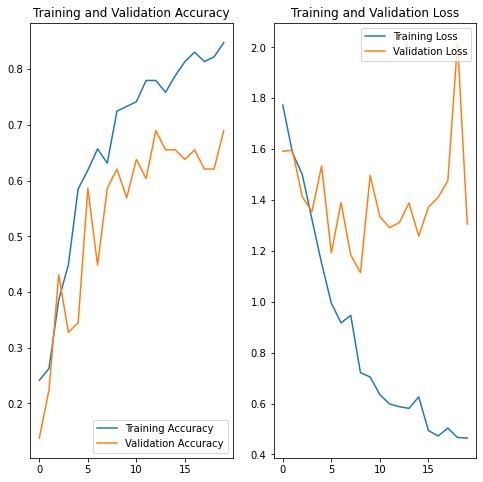

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<p>Una ves que ya entrenamos el modelo con el aumento de datos, usamos el modelo para hacer una clarificación.</p>

<p>La primera imagen para clasificar que usare sera una de Formula 1</p>

In [39]:
from IPython.display import Image
Image(filename='/content/ImgClas/f2.jpg')

In [40]:
sunflower_url = "/content/ImgClas/f2.jpg"
sunflower_path = tf.keras.utils.get_file('/content/ImgClas/f2.jpg', '/content/ImgClas/')

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Esta imagen es de {} con {:.2f}% de probabilidad."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen es de formula1 con 99.00% de probabilidad.


In [41]:
from IPython.display import Image
Image(filename='/content/ImgClas/basquet2.jpg')

In [42]:
sunflower_url = "/content/ImgClas/basquet2.jpg"
sunflower_path = tf.keras.utils.get_file('/content/ImgClas/basquet2.jpg', '/content/ImgClas/')

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Esta imagen es de {} con {:.2f}% de probabilidad."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen es de basketball con 98.49% de probabilidad.


Para terminar ejecutaremos una prueba con una imagen de un deporte que no este dendro de las clases antes establecidas 

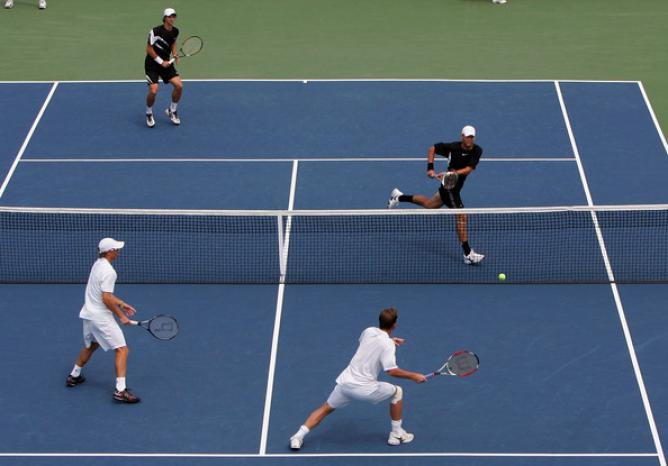

In [56]:
from IPython.display import Image
Image(filename='/content/ImgClas/tenis.jpg')

In [59]:
sunflower_url = "/content/ImgClas/tenis.jpg"
sunflower_path = tf.keras.utils.get_file('/content/ImgClas/tenis.jpg', '/content/ImgClas/')

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Esta imagen es de {} con {:.2f}% de probabilidad."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen es de baseball con 47.04% de probabilidad.


In [60]:
from IPython.display import Image
Image(filename='/content/ImgClas/base2.jpg')

In [61]:
sunflower_url = "/content/ImgClas/base2.jpg"
sunflower_path = tf.keras.utils.get_file('/content/ImgClas/base2.jpg', '/content/ImgClas/')

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "Esta imagen es de {} con {:.2f}% de probabilidad."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Esta imagen es de baseball con 58.18% de probabilidad.


En esta ultima prueba podemos ver que la probabilidad es correcta pero mas baja que en las pruebas anteriores. 